In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc

import astropy.units as u
import aplpy
# from spectral_cube import SpectralCube
from astropy.io import fits
from reproject import reproject_interp
from astropy.constants import c, k_B, h

from scipy import stats

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
rc('font', **{'family': 'serif'})
rc('text', usetex=True)

In [2]:
snr_min = 5
file_oNH2D_thick_para = 'fits/H-MM1_oNH2D_fit_thick_par_snr{0}.fits'.format(snr_min)
file_oNH2D_thin_para = 'fits/H-MM1_oNH2D_fit_thin_par_snr{0}.fits'.format(snr_min)

file_pNH2D_thick_para = 'fits/H-MM1_pNH2D_fit_thick_par_snr{0}.fits'.format(snr_min)
file_pNH2D_thin_para = 'fits/H-MM1_pNH2D_fit_thin_par_snr{0}.fits'.format(snr_min)

file_NH3_thick_para = 'fits/H-MM1_NH3_fit_thick_par_snr{0}.fits'.format(snr_min)

file_oNH2D_Tex = 'fits/H-MM1_oNH2D_thick_Tex_snr{0}.fits'.format(snr_min)
file_oNH2D_eTex = 'fits/H-MM1_oNH2D_thick_eTex_snr{0}.fits'.format(snr_min)
file_oNH2D_tau = 'fits/H-MM1_oNH2D_thick_tau_snr{0}.fits'.format(snr_min)
file_oNH2D_etau = 'fits/H-MM1_oNH2D_thick_etau_snr{0}.fits'.format(snr_min)
file_oNH2D_Vlsr = 'fits/H-MM1_oNH2D_thick_Vlsr_snr{0}.fits'.format(snr_min)
file_oNH2D_eVlsr = 'fits/H-MM1_oNH2D_thick_eVlsr_snr{0}.fits'.format(snr_min)
file_oNH2D_dv = 'fits/H-MM1_oNH2D_thick_sigma_v_snr{0}.fits'.format(snr_min)
file_oNH2D_edv = 'fits/H-MM1_oNH2D_thick_esigma_v_snr{0}.fits'.format(snr_min)

file_pNH2D_Tex = 'fits/H-MM1_pNH2D_thick_Tex_snr{0}.fits'.format(snr_min)
file_pNH2D_eTex = 'fits/H-MM1_pNH2D_thick_eTex_snr{0}.fits'.format(snr_min)
file_pNH2D_tau = 'fits/H-MM1_pNH2D_thick_tau_snr{0}.fits'.format(snr_min)
file_pNH2D_etau = 'fits/H-MM1_pNH2D_thick_etau_snr{0}.fits'.format(snr_min)
file_pNH2D_Vlsr = 'fits/H-MM1_pNH2D_thick_Vlsr_snr{0}.fits'.format(snr_min)
file_pNH2D_eVlsr = 'fits/H-MM1_pNH2D_thick_eVlsr_snr{0}.fits'.format(snr_min)
file_pNH2D_dv = 'fits/H-MM1_pNH2D_thick_sigma_v_snr{0}.fits'.format(snr_min)
file_pNH2D_edv = 'fits/H-MM1_pNH2D_thick_esigma_v_snr{0}.fits'.format(snr_min)

file_NH3_Tex = 'fits/H-MM1_NH3_thick_Tex_snr{0}.fits'.format(snr_min)
file_NH3_eTex = 'fits/H-MM1_NH3_thick_eTex_snr{0}.fits'.format(snr_min)
file_NH3_Tkin = 'fits/H-MM1_NH3_thick_Tkin_snr{0}.fits'.format(snr_min)
file_NH3_eTkin = 'fits/H-MM1_NH3_thick_eTkin_snr{0}.fits'.format(snr_min)
file_NH3_Vlsr = 'fits/H-MM1_NH3_thick_Vlsr_snr{0}.fits'.format(snr_min)
file_NH3_eVlsr = 'fits/H-MM1_NH3_thick_eVlsr_snr{0}.fits'.format(snr_min)
file_NH3_dv = 'fits/H-MM1_NH3_thick_sigma_v_snr{0}.fits'.format(snr_min)
file_NH3_edv = 'fits/H-MM1_NH3_thick_esigma_v_snr{0}.fits'.format(snr_min)
file_NH3_Ncol = 'fits/H-MM1_NH3_thick_Ncol_snr{0}.fits'.format(snr_min)
file_NH3_eNcol = 'fits/H-MM1_NH3_thick_eNcol_snr{0}.fits'.format(snr_min)

In [3]:
file_NH3_TdV = 'data/H-MM1_NH3_11_TdV.fits'

In [4]:
distance = 145. # pc

def plot_setup_vla(fig_i, label_col='black', do_zoom=True):
    fig_i.set_system_latex(True)
    fig_i.ticks.set_color(label_col)
    fig_i.set_nan_color('0.9')
    if do_zoom:
        fig_i.recenter(246.9954991667, -24.5577775, radius=80*(u.arcsec).to(u.deg))
    fig_i.add_beam(color=label_col)
    ang_size = (5e3 / distance)*u.arcsec
    fig_i.add_scalebar(ang_size, label='5,000 au', color=label_col)
    #
    fig_i.tick_labels.set_xformat('hh:mm:ss')
    fig_i.tick_labels.set_yformat('dd:mm:ss')
    fig_i.ticks.set_length(7)
    #
    fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
    fig_i.axis_labels.set_ytext('Declination (J2000)')
    return fig_i


def plot_setup_alma(fig_i, label_col='black', do_zoom=True):
    fig_i.set_system_latex(True)
    fig_i.ticks.set_color(label_col)
    fig_i.set_nan_color('0.9')
    if do_zoom:
        fig_i.recenter(246.9954991667, -24.5577775, radius=62*(u.arcsec).to(u.deg))
    fig_i.add_beam(color=label_col)
    ang_size = (5e3 / distance)*u.arcsec
    fig_i.add_scalebar(ang_size, label='5,000 au', color=label_col)
    #
    fig_i.tick_labels.set_xformat('hh:mm:ss')
    fig_i.tick_labels.set_yformat('dd:mm:ss')
    fig_i.ticks.set_length(7)
    #
    fig_i.axis_labels.set_xtext('Right Ascension (J2000)')
    fig_i.axis_labels.set_ytext('Declination (J2000)')
    return fig_i

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmax to  5.381e+00 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  cm.set_bad(color)


INFO: Auto-setting resolution to 54.7968 dpi [aplpy.core]


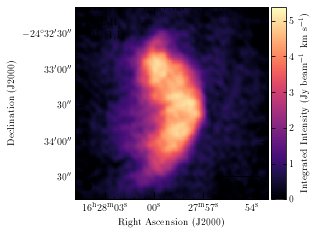

In [5]:
# data, hd = fits.getdata(file_NH3_TdV, header=True)
# hdu_mJy = fits.PrimaryHDU(data*1e3, hd)

fig_i = aplpy.FITSFigure(file_NH3_TdV, figsize=(4.5,4.5))
fig_i.show_colorscale(vmin=0, cmap='magma')
plot_setup_vla(fig_i, label_col='black')

fig_i.add_label(0.05, 0.92, 'H-MM1', relative=True, horizontalalignment='left')
fig_i.add_label(0.05, 0.85, r'NH$_3$(1,1)', relative=True, horizontalalignment='left')

fig_i.add_colorbar()
# fig_i.colorbar.set_ticks([0,40,80,120,160])
fig_i.colorbar.set_axis_label_text('Integrated Intensity (Jy beam$^{-1}$ km s$^{-1}$)')
plt.tight_layout()                                                      

fig_i.savefig('figs/H-MM1_NH3_TdV.pdf')

In [6]:
fit_NH3_thick, hd_NH3 = fits.getdata(file_NH3_thick_para, 
                                         header=True)
hd_NH3_2d = hd_NH3.copy()
key_list = ['NAXIS3', 'CRPIX3', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3', 
            'OBSGEO-Z', 'OBSGEO-Y', 'OBSGEO-X', 'SPECSYS']
for key_i in key_list:
    hd_NH3_2d.remove(key_i)
hd_NH3_2d['NAXIS'] = 2
hd_NH3_2d['WCSAXES'] = 2

snr_min_tau = 3.0

NH3_Tkin = fit_NH3_thick[0, :, :]
NH3_eTkin = fit_NH3_thick[6, :, :]
NH3_Tex = fit_NH3_thick[1, :, :]
NH3_eTex = fit_NH3_thick[7, :, :]
NH3_Ncol = fit_NH3_thick[2, :, :]
NH3_eNcol = fit_NH3_thick[8, :, :]
NH3_dv = fit_NH3_thick[3, :, :]
NH3_edv = fit_NH3_thick[9, :, :]
NH3_Vlsr = fit_NH3_thick[4, :, :]
NH3_eVlsr = fit_NH3_thick[10, :, :]

# Vlsr +- 0.05 km/s
bad = (NH3_eVlsr > 0.02) | (NH3_eVlsr == 0.0)
NH3_Vlsr[bad] = np.nan
NH3_eVlsr[bad] = np.nan
# dv +- 0.05 km/s
bad = (NH3_edv > 0.015) | np.isnan(NH3_Vlsr)
NH3_dv[bad] = np.nan
NH3_edv[bad] = np.nan
# Tkin +- 1 K
bad = (NH3_eTkin > 1.0) | (NH3_eTkin == 0.0) | np.isnan(NH3_dv)
NH3_Tkin[bad] = np.nan
NH3_eTkin[bad] = np.nan
# Tex +- 1 K
bad = (NH3_eTex > 1.0) | np.isnan(NH3_eTkin)
NH3_Tex[bad] = np.nan
NH3_eTex[bad] = np.nan

NH3_Ncol[bad] = np.nan
NH3_eNcol[bad] = np.nan

#
hd_NH3_2d['BUNIT'] = 'K'
fits.writeto(file_NH3_Tex, NH3_Tex, hd_NH3_2d, overwrite=True)
fits.writeto(file_NH3_eTex, NH3_eTex, hd_NH3_2d, overwrite=True)
hd_NH3_2d['BUNIT'] = 'K'
fits.writeto(file_NH3_Tkin, NH3_Tkin, hd_NH3_2d, overwrite=True)
fits.writeto(file_NH3_eTkin, NH3_eTkin, hd_NH3_2d, overwrite=True)
hd_NH3_2d['BUNIT'] = 'log(cm-2)'
fits.writeto(file_NH3_Ncol, NH3_Ncol, hd_NH3_2d, overwrite=True)
fits.writeto(file_NH3_eNcol, NH3_eNcol, hd_NH3_2d, overwrite=True)
hd_NH3_2d['BUNIT'] = 'km/s'
fits.writeto(file_NH3_Vlsr, NH3_Vlsr, hd_NH3_2d, overwrite=True)
fits.writeto(file_NH3_eVlsr, NH3_eVlsr, hd_NH3_2d, overwrite=True)
hd_NH3_2d['BUNIT'] = 'km/s'
fits.writeto(file_NH3_dv, NH3_dv, hd_NH3_2d, overwrite=True)
fits.writeto(file_NH3_edv, NH3_edv, hd_NH3_2d, overwrite=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


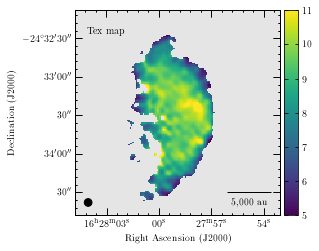

In [7]:
fig = aplpy.FITSFigure(file_NH3_Tex, figsize=(4,4))
fig.show_colorscale(vmin=5., vmax=11.)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Tex map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


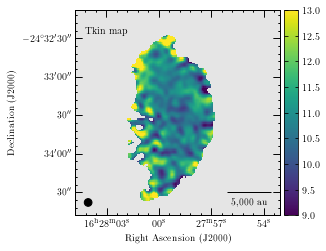

In [8]:
fig = aplpy.FITSFigure(file_NH3_Tkin, figsize=(4,4))
fig.show_colorscale(vmin=9., vmax=13.)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Tkin map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


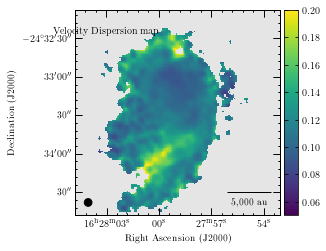

In [9]:
fig = aplpy.FITSFigure(file_NH3_dv, figsize=(4,4))
fig.show_colorscale(vmin=0.05, vmax=0.2)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Velocity Dispersion map', relative=True)

INFO: Auto-setting vmin to -9.439e-05 [aplpy.core]
INFO: Auto-setting vmax to  1.635e-02 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


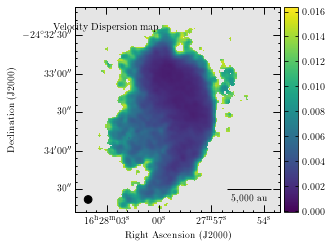

In [10]:
fig = aplpy.FITSFigure(file_NH3_edv, figsize=(4,4))
fig.show_colorscale()#vmin=0.05, vmax=0.2)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Velocity Dispersion map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


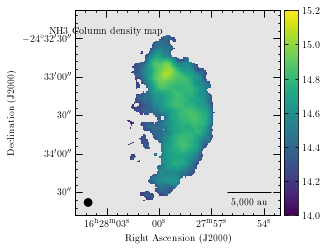

In [11]:
fig = aplpy.FITSFigure(file_NH3_Ncol, figsize=(4,4))
fig.show_colorscale(vmin=14.0, vmax=15.2)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'NH3 Column density map', relative=True)

INFO: Auto-setting vmin to  3.335e-03 [aplpy.core]
INFO: Auto-setting vmax to  7.739e-02 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


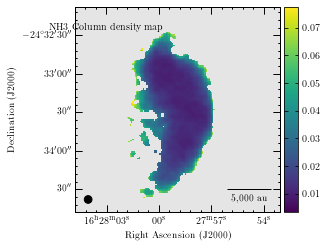

In [12]:
fig = aplpy.FITSFigure(file_NH3_eNcol, figsize=(4,4))
fig.show_colorscale()#vmin=0.05, vmax=0.2)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'NH3 Column density map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


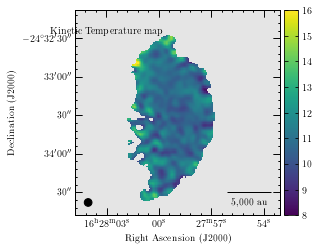

In [13]:
fig = aplpy.FITSFigure(file_NH3_Tkin, figsize=(4,4))
fig.show_colorscale(vmin=8, vmax=16.)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Kinetic Temperature map', relative=True)

INFO: Auto-setting vmin to  1.074e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.074e+00 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


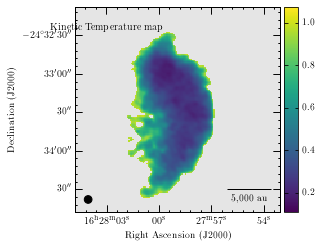

In [14]:
fig = aplpy.FITSFigure(file_NH3_eTkin, figsize=(4,4))
fig.show_colorscale()#vmin=8, vmax=16.)
plot_setup_vla(fig, do_zoom=True)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Kinetic Temperature map', relative=True)

In [15]:
np.nanmean(NH3_Tkin)

11.072931750954105

## Combine parameters of ortho-NH$_2$D
Load optically thin and thick models and then merge then.

In [16]:
fit_oNH2D_thick, hd_oNH2D = fits.getdata(file_oNH2D_thick_para, 
                                         header=True)
fit_oNH2D_thin = fits.getdata(file_oNH2D_thin_para)

In [17]:
hd_oNH2D_2d = hd_oNH2D.copy()
key_list = ['NAXIS3', 'CRPIX3', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3', 
            'OBSGEO-Z', 'OBSGEO-Y', 'OBSGEO-X']
for key_i in key_list:
    hd_oNH2D_2d.remove(key_i)
hd_oNH2D_2d['NAXIS'] = 2
hd_oNH2D_2d['WCSAXES'] = 2

snr_min_tau = 3.0
# fit_oNH2D_thick[fit_oNH2D_thick == 0] = np.nan
# fit_oNH2D_thin[fit_oNH2D_thin == 0] = np.nan

# Optically thick if tau > 3* etau
# Tex != 20 K   error_tau < 1
oNH2D_mask = (fit_oNH2D_thick[1, :, :] > snr_min_tau*fit_oNH2D_thick[5, :, :]) & \
             (fit_oNH2D_thick[1, :, :] != 50.0) & (fit_oNH2D_thick[0, :, :] != 20.0) &\
             (fit_oNH2D_thick[5, :, :] < 1.0)
fit_oNH2D_para = fit_oNH2D_thick * oNH2D_mask \
                 + (1 - oNH2D_mask) * fit_oNH2D_thin
oNH2D_Tex = fit_oNH2D_para[0, :, :]
oNH2D_eTex = fit_oNH2D_para[4, :, :]
oNH2D_tau = fit_oNH2D_para[1, :, :]
oNH2D_etau = fit_oNH2D_para[5, :, :]
oNH2D_Vlsr = fit_oNH2D_para[2, :, :]
oNH2D_eVlsr = fit_oNH2D_para[6, :, :]
oNH2D_dv = fit_oNH2D_para[3, :, :]
oNH2D_edv = fit_oNH2D_para[7, :, :]
#
hd_oNH2D_2d['BUNIT'] = 'K'
fits.writeto(file_oNH2D_Tex, oNH2D_Tex, hd_oNH2D_2d, overwrite=True)
fits.writeto(file_oNH2D_eTex, oNH2D_eTex, hd_oNH2D_2d, overwrite=True)
hd_oNH2D_2d['BUNIT'] = ''
fits.writeto(file_oNH2D_tau, oNH2D_tau, hd_oNH2D_2d, overwrite=True)
fits.writeto(file_oNH2D_etau, oNH2D_etau, hd_oNH2D_2d, overwrite=True)
hd_oNH2D_2d['BUNIT'] = 'km/s'
oNH2D_Vlsr[oNH2D_Vlsr == 0.0] = np.nan
oNH2D_eVlsr[oNH2D_eVlsr == 0.0] = np.nan
fits.writeto(file_oNH2D_Vlsr, oNH2D_Vlsr, hd_oNH2D_2d, overwrite=True)
fits.writeto(file_oNH2D_eVlsr, oNH2D_eVlsr, hd_oNH2D_2d, overwrite=True)
hd_oNH2D_2d['BUNIT'] = 'km/s'
oNH2D_dv[oNH2D_dv == 0.0] = np.nan
oNH2D_edv[oNH2D_edv == 0.0] = np.nan
fits.writeto(file_oNH2D_dv, oNH2D_dv, hd_oNH2D_2d, overwrite=True)
fits.writeto(file_oNH2D_edv, oNH2D_edv, hd_oNH2D_2d, overwrite=True)

In [18]:
hd_oNH2D_2d['BUNIT'] = 'km/s'
hdu_oNH2D_vlsr_thick = fits.PrimaryHDU(oNH2D_Vlsr/oNH2D_mask, hd_oNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [19]:
hd_oNH2D_2d['BUNIT'] = 'km/s'
hdu_oNH2D_dv_thick = fits.PrimaryHDU(oNH2D_dv/oNH2D_mask, hd_oNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [20]:
hd_oNH2D_2d['BUNIT'] = ''
hdu_oNH2D_tau = fits.PrimaryHDU(oNH2D_tau/oNH2D_mask, hd_oNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [21]:
hd_oNH2D_2d['BUNIT'] = ''
hdu_oNH2D_etau = fits.PrimaryHDU(oNH2D_etau/oNH2D_mask, hd_oNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [22]:
hd_oNH2D_2d['BUNIT'] = 'K'
hdu_oNH2D_Tex = fits.PrimaryHDU(oNH2D_Tex/oNH2D_mask, hd_oNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [23]:
hd_oNH2D_2d['BUNIT'] = 'K'
hdu_oNH2D_eTex = fits.PrimaryHDU(oNH2D_eTex/oNH2D_mask, hd_oNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


## Combine parameters of para-NH$_2$D
Load optically thin and thick models and then merge then.

In [24]:
fit_pNH2D_thick, hd_pNH2D = fits.getdata(file_pNH2D_thick_para, 
                                         header=True)
fit_pNH2D_thin = fits.getdata(file_pNH2D_thin_para)

In [25]:
hd_pNH2D_2d = hd_pNH2D.copy()
key_list = ['NAXIS3', 'CRPIX3', 'CDELT3', 'CUNIT3', 'CTYPE3', 'CRVAL3', 
            'OBSGEO-Z', 'OBSGEO-Y', 'OBSGEO-X']
for key_i in key_list:
    hd_pNH2D_2d.remove(key_i)
hd_pNH2D_2d['NAXIS'] = 2
hd_pNH2D_2d['WCSAXES'] = 2

snr_min_tau = 3.0
# fit_oNH2D_thick[fit_oNH2D_thick == 0] = np.nan
# fit_oNH2D_thin[fit_oNH2D_thin == 0] = np.nan

# Optically thick if tau > 3* etau
# Tex != 20 K   error_tau < 1
pNH2D_mask = (fit_pNH2D_thick[1, :, :] > snr_min_tau*fit_pNH2D_thick[5, :, :]) & \
             (fit_pNH2D_thick[1, :, :] != 50.0) & (fit_pNH2D_thick[0, :, :] != 20.0) &\
             (fit_pNH2D_thick[5, :, :] < 1.0)
fit_pNH2D_para = fit_pNH2D_thick * pNH2D_mask \
                 + (1 - pNH2D_mask) * fit_pNH2D_thin
pNH2D_Tex = fit_pNH2D_para[0, :, :]
pNH2D_eTex = fit_pNH2D_para[4, :, :]
pNH2D_tau = fit_pNH2D_para[1, :, :]
pNH2D_etau = fit_pNH2D_para[5, :, :]
pNH2D_Vlsr = fit_pNH2D_para[2, :, :]
pNH2D_eVlsr = fit_pNH2D_para[6, :, :]
pNH2D_dv = fit_pNH2D_para[3, :, :]
pNH2D_edv = fit_pNH2D_para[7, :, :]
#
hd_pNH2D_2d['BUNIT'] = 'K'
fits.writeto(file_pNH2D_Tex, pNH2D_Tex, hd_pNH2D_2d, overwrite=True)
fits.writeto(file_pNH2D_eTex, pNH2D_eTex, hd_pNH2D_2d, overwrite=True)
hd_pNH2D_2d['BUNIT'] = ''
fits.writeto(file_pNH2D_tau, pNH2D_tau, hd_pNH2D_2d, overwrite=True)
fits.writeto(file_pNH2D_etau, pNH2D_etau, hd_pNH2D_2d, overwrite=True)
hd_pNH2D_2d['BUNIT'] = 'km/s'
pNH2D_Vlsr[pNH2D_Vlsr == 0.0] = np.nan
pNH2D_eVlsr[pNH2D_eVlsr == 0.0] = np.nan
fits.writeto(file_pNH2D_Vlsr, pNH2D_Vlsr, hd_pNH2D_2d, overwrite=True)
fits.writeto(file_pNH2D_eVlsr, pNH2D_eVlsr, hd_pNH2D_2d, overwrite=True)
hd_pNH2D_2d['BUNIT'] = 'km/s'
pNH2D_dv[pNH2D_dv == 0.0] = np.nan
pNH2D_edv[pNH2D_edv == 0.0] = np.nan
fits.writeto(file_pNH2D_dv, pNH2D_dv, hd_pNH2D_2d, overwrite=True)
fits.writeto(file_pNH2D_edv, pNH2D_edv, hd_pNH2D_2d, overwrite=True)

In [26]:
hd_pNH2D_2d['BUNIT'] = 'km/s'
hdu_pNH2D_vlsr_thick = fits.PrimaryHDU(pNH2D_Vlsr/pNH2D_mask, hd_pNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [27]:
hd_pNH2D_2d['BUNIT'] = 'km/s'
hdu_pNH2D_dv_thick = fits.PrimaryHDU(pNH2D_dv/pNH2D_mask, hd_pNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [28]:
hd_pNH2D_2d['BUNIT'] = ''
hdu_pNH2D_tau = fits.PrimaryHDU(pNH2D_tau/pNH2D_mask, hd_pNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [29]:
hd_pNH2D_2d['BUNIT'] = ''
hdu_pNH2D_etau = fits.PrimaryHDU(pNH2D_etau/pNH2D_mask, hd_pNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [30]:
hd_pNH2D_2d['BUNIT'] = 'K'
hdu_pNH2D_Tex = fits.PrimaryHDU(pNH2D_Tex/pNH2D_mask, hd_pNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [31]:
hd_pNH2D_2d['BUNIT'] = 'K'
hdu_pNH2D_eTex = fits.PrimaryHDU(pNH2D_eTex/pNH2D_mask, hd_pNH2D_2d)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


## Maps of NH$_2$D parameters
### Tau
First pair of plots are the value and uncertainty of Tau.

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


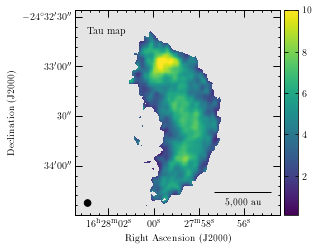

In [32]:
fig = aplpy.FITSFigure(hdu_oNH2D_tau, figsize=(4,4))
fig.show_colorscale(vmin=0.1, vmax=10.)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Tau map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


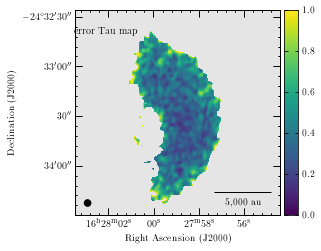

In [33]:
fig = aplpy.FITSFigure(hdu_oNH2D_etau, figsize=(4,4))
fig.show_colorscale(vmin=0., vmax=1.)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'error Tau map', relative=True)

### Tex

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


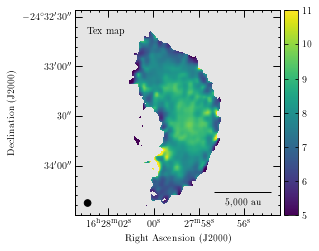

In [34]:
fig = aplpy.FITSFigure(hdu_oNH2D_Tex, figsize=(4,4))
fig.show_colorscale(vmin=5., vmax=11.)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Tex map', relative=True)

INFO: Auto-setting vmin to -9.328e-02 [aplpy.core]
INFO: Auto-setting vmax to  1.877e+00 [aplpy.core]


/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


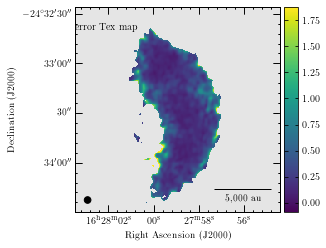

In [35]:
fig = aplpy.FITSFigure(hdu_oNH2D_eTex, figsize=(4,4))
fig.show_colorscale()#vmin=0., vmax=1.)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'error Tex map', relative=True)

In [36]:
oNH2D_Tau_dv = oNH2D_tau * oNH2D_dv
hd_oNH2D_2d['BUNIT'] = ''
hdu_oNH2D_taudv = fits.PrimaryHDU(oNH2D_Tau_dv, hd_oNH2D_2d)

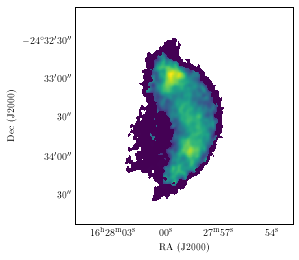

In [37]:
fig = aplpy.FITSFigure(hdu_oNH2D_taudv, figsize=(4,4))
fig.show_colorscale(vmin=1e-2, vmax=1.)
# fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)


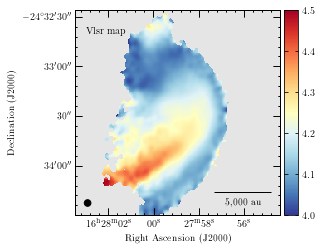

In [38]:
fig = aplpy.FITSFigure(file_oNH2D_Vlsr, figsize=(4,4))
fig.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Vlsr map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)


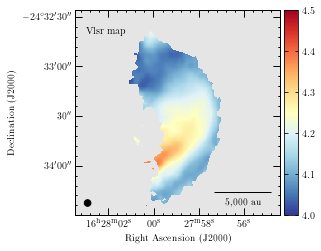

In [39]:
fig = aplpy.FITSFigure(hdu_oNH2D_vlsr_thick, figsize=(4,4))
fig.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Vlsr map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Blues"))
  cm.set_bad(color)


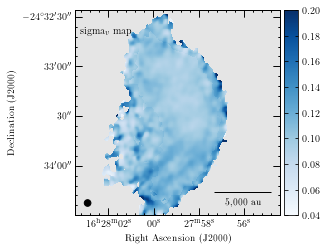

In [40]:
fig = aplpy.FITSFigure(file_oNH2D_dv, figsize=(4,4))
fig.show_colorscale(cmap='Blues', vmin=0.04, vmax=0.2)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'sigma$_v$ map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  cm.set_bad(color)


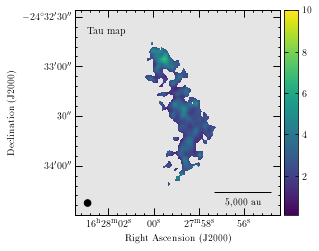

In [41]:
fig = aplpy.FITSFigure(hdu_pNH2D_tau, figsize=(4,4))
fig.show_colorscale(vmin=0.1, vmax=10.)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Tau map', relative=True)

/Users/jpineda/miniconda3/envs/py3/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdYlBu_r"))
  cm.set_bad(color)


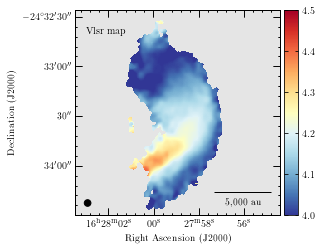

In [42]:
fig = aplpy.FITSFigure(file_pNH2D_Vlsr, figsize=(4,4))
fig.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'Vlsr map', relative=True)

## Checks of different variables

For sanity, it is always useful to perform different comparisons. First step will be plotting tau and error on tau, sometime some odd correlations are identified. Lets keep in mind that the minimum signal to noise in tau of 3 was already enforced.

Text(0, 0.5, 'Error Tau')

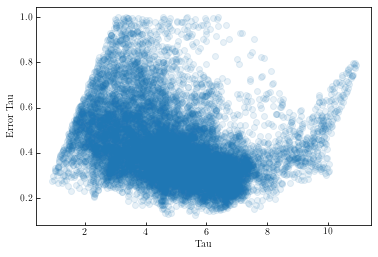

In [43]:
plt.scatter(oNH2D_tau[oNH2D_mask], oNH2D_etau[oNH2D_mask], alpha=0.1)
plt.xlabel('Tau')
plt.ylabel('Error Tau')

The figure above does not show any obvious problem. 

Now lets check the velocity and tau uncertainties.

Text(0, 0.5, 'Error Tau')

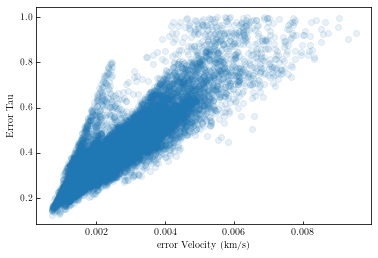

In [44]:
plt.scatter(oNH2D_eVlsr[oNH2D_mask], oNH2D_etau[oNH2D_mask], alpha=0.1)
plt.xlabel('error Velocity (km/s)')
plt.ylabel('Error Tau')

This figure shows that these uncertainties are highly correlated, which makes sense, since a poor determination of tau will imply a poor determination of the centroid velocity. However, notice that the uncertainty in the velocity is minimal.

Text(0, 0.5, 'Tex (K)')

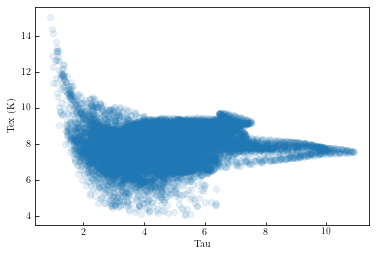

In [45]:
plt.scatter(oNH2D_tau[oNH2D_mask], oNH2D_Tex[oNH2D_mask], alpha=0.1)
plt.xlabel('Tau')
plt.ylabel('Tex (K)')

## KDE
Now I will generate the KDE for tau and Tex to reveal the distribution of these parameters.

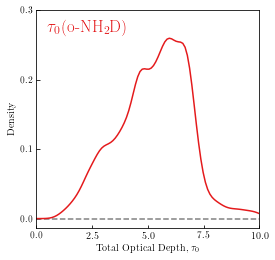

In [46]:
color_kde = '#e41a1c'
# xrange = np.array([0, np.log10(12)])
xrange = np.array([0, 10.])


gd_tau = oNH2D_mask & (oNH2D_etau > 0.)
wt = 1 / oNH2D_etau[gd_tau]**2
# gd_tau = oNH2D_mask
kde_tau = stats.gaussian_kde(oNH2D_tau[gd_tau], weights=wt)
x_sample = np.linspace(xrange[0], xrange[1], num=100)
tau_sample = np.reshape(kde_tau(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4,4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, tau_sample, color=color_kde, label=r'$\tau_0$')
#
ax.text(0.05, 0.9,  r'$\tau_0$(o-NH$_2$D)', color=color_kde, 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Total Optical Depth, $\tau_{0}$")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange)


ax.set_xticks([0, 2.5, 5, 7.5, 10])
ax.set_yticks([0, 0.1, 0.2, 0.3])


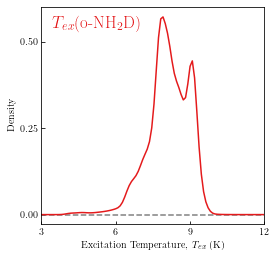

In [47]:
color_kde = '#e41a1c'
xrange_tex = np.array([3, 12])

wt_tex = 1. / oNH2D_eTex[gd_tau]**2
kde_tex = stats.gaussian_kde(oNH2D_Tex[gd_tau], weights=wt_tex)
x_sample = np.linspace(xrange_tex[0], xrange_tex[1], num=100)
tex_sample = np.reshape(kde_tex(x_sample).T, x_sample.shape)

fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange_tex, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, tex_sample, color=color_kde, label=r'$\tau_0$')
#
ax.text(0.05, 0.9,  r'$T_{ex}$(o-NH$_2$D)', color=color_kde, 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Excitation Temperature, $T_{ex}$ (K)")
ax.set_ylabel(r"Density")
ax.set_xlim(xrange_tex)


ax.set_xticks([3, 6, 9, 12])
ax.set_yticks([0, 0.25, 0.5])


In [48]:
def hmm1_kde(my_X, my_Y, ymin=0, ymax=2.5, xmin=-0.0002, xmax=0.0008, 
             get_XY=False):
#     ymin=0
#     ymax=2.5
#     xmin=-0.0002
#     xmax=0.0008
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([my_X, my_Y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    if get_XY == False:
        return Z
    else:
        return X, Y, Z


# gd = (Tau_dv > 0.2)
# ymin_flux=0
# ymax_flux=2.5
# xmin_flux=-0.0002
# xmax_flux=0.0008
# X_KDE, Y_KDE, Z_flux = L1544_KDE(new_image[gd], Tau_dv[gd], 
#                                  xmin=xmin_flux, xmax=xmax_flux, ymin=ymin_flux, ymax=ymax_flux, 
#                                  get_XY=True)

### Column density calculations

The column density of para/ortho-NH$_2$D is determined using the optically thin column density approximation:
$$N({\rm p/o-NH_2D})_{total} = \frac{8\pi \nu^3}{c^3 A_{ul}} \frac{Q(T_{ex})}{g_u e^{-E_u/kT_{ex}}} \left[e^{h\nu/kT_{ex}}-1\right]^{-1}\int \tau dv~,$$
where
$$ \int \tau dv = \sqrt{2\pi}\ \tau_0 \sigma_v~.$$
This value is consistent with those used by Harju et al. (2017, https://ui.adsabs.harvard.edu/abs/2017A%26A...600A..61H/abstract).

In [49]:
# g_u and E_u values obtained from LAMBDA database
# https://home.strw.leidenuniv.nl/~moldata/datafiles/p-nh2d.dat
gu_p_list = np.array([3.0, 9.0, 9.0, 9.0, 15.0, 15.0, 15.0, 15.0, 15.0,
                    21.0, 21.0, 21.0, 21.0, 21.0, 21.0, 21.0,
                    27.0, 27.0, 27.0, 27.0, 27.0, 27.0, 27.0,
                    33.0, 33.0, 27.0, 27.0, 33.0, 33.0, 33.0])
E_u_p_list = (np.array([0.0, 11.1018, 14.7761, 16.4932, 32.7820, 35.2555,
                     40.4052, 49.8154, 50.3348, 64.2466, 65.6823,
                     75.8736, 83.0973, 85.4414, 104.3779, 104.4807,
                     104.9901, 105.8248, 122.2922, 127.0495, 133.0003,
                     149.5094, 150.1873, 154.9357, 155.5045, 177.2895,
                     177.3063, 178.7962, 181.3445, 192.6501]) 
            * (h*c/k_B) / u.cm).to(u.K)
p_full_index = np.arange(np.size(E_u_p_list))

# g_u and E_u values obtained from LAMBDA database
# https://home.strw.leidenuniv.nl/~moldata/datafiles/o-nh2d.dat
gu_o_list = np.array([9.0, 27.0, 27.0, 27.0, 45.0, 45.0, 45.0, 45.0, 45.0,
                    63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 
                    81.0, 81.0, 81.0, 81.0, 81.0, 81.0, 81.0,
                    99.0, 99.0, 81.0, 81.0, 99.0, 99.0, 99.0])
E_u_o_list = (np.array([0.4059, 11.5063, 14.3725, 16.0925, 33.1852, 34.8518,
                     40.0099, 50.2077, 50.7258, 64.6502, 65.2776,
                     75.4853, 83.4858, 85.8243, 104.0016, 104.1048,    
                     105.3963, 105.4179, 121.9107, 127.4339, 133.3719,
                     149.1397, 149.8199, 155.0938, 155.3460, 177.6453,
                     177.6620, 178.4192, 181.7254, 193.0089]) 
            * (h*c/k_B) / u.cm).to(u.K)
o_full_index = np.arange(np.size(E_u_o_list))

def Q_p_NH2D_i(index, Tex=5*u.K):
    """
    The function returns the individual elements of the partition function:
    the occupancy of each level dependent on degeneracy and energy level 
    for a given excitation temperature. 
    """
    return gu_p_list[index]*np.exp(-E_u_p_list[index]/Tex)


def Q_p_NH2D(Tex=5*u.K):
    """
    It returns the particion function for para-NH2D with an excitation 
    temperature.
    It uses the first 30-energy levels.
    """
    if Tex.size == 1:
        return np.sum(Q_p_NH2D_i(p_full_index, Tex=Tex))
    else:
        Q_p_NH2D_all = Tex.value * 0
        for i in range(Tex.size):
            Q_p_NH2D_all[i] = np.sum(Q_p_NH2D_i(p_full_index, Tex=Tex[i]))
        return Q_p_NH2D_all

    
def Q_o_NH2D_i(index, Tex=5*u.K):
    """
    The function returns the individual elements of the partition function:
    the occupancy of each level dependent on degeneracy and energy level 
    for a given excitation temperature. 
    """
    return gu_o_list[index]*np.exp(-E_u_o_list[index]/Tex)


def Q_o_NH2D(Tex=5*u.K):
    """
    It returns the particion function for ortho-NH2D with an excitation 
    temperature.
    It uses the first 30-energy levels.
    """
    if Tex.size == 1:
        return np.sum(Q_o_NH2D_i(o_full_index, Tex=Tex))
    else:
        Q_o_NH2D_all = Tex.value * 0
        for i in range(Tex.size):
            Q_o_NH2D_all[i] = np.sum(Q_o_NH2D_i(o_full_index, Tex=Tex[i]))
        return Q_o_NH2D_all


def p_NH2D_Column_Density(Tex=5*u.K, sigma_v=0.2*u.km/u.s, tau=2.0):
    """
    Column density determination for the para-NH2D (1_{11}-1{01}) transition.
    The frequency and Einstein coefficient are obtained from LAMBDA database.
    """
    freq = 110.153594*u.GHz
    A_ul = 0.165e-4/u.s
    J_up = 2
    TdV = np.sqrt(2*np.pi) * tau * sigma_v
    Ncol = (8*np.pi*freq**3/c**3)*Q_p_NH2D(Tex=Tex) / A_ul / Q_p_NH2D_i(J_up, Tex=Tex) \
         / (np.exp(h*freq/k_B/Tex)-1) * TdV
    return Ncol.to(u.cm**-2)


def o_NH2D_Column_Density(Tex=5*u.K, sigma_v=0.2*u.km/u.s, tau=2.0):
    """
    Column density determination for the ortho-NH2D (1_{11}-1{01}) transition.
    The frequency and Einstein coefficient are obtained from LAMBDA database.
    """
    freq = 85.92627*u.GHz
    A_ul = 0.782e-5/u.s
    J_up = 2
    TdV = np.sqrt(2*np.pi) * tau * sigma_v
    Ncol = (8*np.pi*freq**3/c**3)*Q_o_NH2D(Tex=Tex) / A_ul / Q_o_NH2D_i(J_up, Tex=Tex) \
         / (np.exp(h*freq/k_B/Tex)-1) * TdV
    return Ncol.to(u.cm**-2)

def c_tau(tau):
    return tau / (1 - np.exp(-tau))


Here we check the validity of the function by comparing with previous calculations from Harju et al. (2017).

o-NH$_2$D ($1_{11}$-$1_{01}$) at 85.9 GHz, $\tau_0$=5.1, T$_{ex}$=7.0 K, $\Delta v$=0.235 km/s  $\rightarrow$ N(o-NH$_2$D)$_{tot}=1.1\times10^{14}$ cm$^{-2}$.

p-NH$_2$D ($1_{11}$-$1_{01}$) at 110.2 GHz, $\tau_0$=2.3, T$_{ex}$=5.9 K, $\Delta v$=0.222 km/s  $\rightarrow$ N(p-NH$_2$D)$_{tot}=4.6\times10^{13}$ cm$^{-2}$

In [50]:
o_NH2D_Column_Density(tau=5.1, Tex=7.0*u.K, sigma_v=0.235/2.355*u.km/u.s)

<Quantity 1.13788657e+14 1 / cm2>

In [51]:
p_NH2D_Column_Density(tau=2.3, Tex=5.9*u.K, sigma_v=0.222/2.355*u.km/u.s)

<Quantity 4.64035251e+13 1 / cm2>

The mean excitation temperature for o-NH2D is estimated using only those pixels with a good optically thick fit. This value could be used to derive a comparison of the column density range.

After determining this value, then we calculate the column density for the full fit and for the that using the mean Tex.

In [52]:
oTex_mean = oNH2D_Tex[oNH2D_mask].mean() * u.K
pTex_mean = pNH2D_Tex[pNH2D_mask].mean() * u.K
print(oTex_mean, pTex_mean)

7.969522297707592 K 7.26364770203514 K


In [53]:
HMM1_oNH2D_Ncol_full = o_NH2D_Column_Density(tau=oNH2D_tau[oNH2D_mask], Tex=oNH2D_Tex[oNH2D_mask]*u.K, sigma_v=oNH2D_dv[oNH2D_mask]*u.km/u.s) * c_tau(oNH2D_tau[oNH2D_mask])

In [54]:
HMM1_pNH2D_Ncol_full = p_NH2D_Column_Density(tau=pNH2D_tau[pNH2D_mask], Tex=pNH2D_Tex[pNH2D_mask]*u.K, 
                                             sigma_v=pNH2D_dv[pNH2D_mask]*u.km/u.s) * c_tau(pNH2D_tau[pNH2D_mask])

In [55]:
HMM1_oNH2D_Ncol_mTex = o_NH2D_Column_Density(tau=oNH2D_tau[oNH2D_mask], Tex=oTex_mean, 
                                             sigma_v=oNH2D_dv[oNH2D_mask]*u.km/u.s) * c_tau(oNH2D_tau[oNH2D_mask])

In [56]:
HMM1_pNH2D_Ncol_mTex = p_NH2D_Column_Density(tau=pNH2D_tau[pNH2D_mask], Tex=pTex_mean, 
                                             sigma_v=pNH2D_dv[pNH2D_mask]*u.km/u.s) * c_tau(pNH2D_tau[pNH2D_mask])

The difference between those two estimates could be substantial, and it is only due to the difference in excitation temperature.

Text(0, 0.5, 'N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$) (10$^{14}$ cm$^{-2}$)')

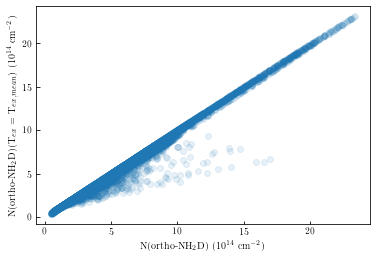

In [57]:
plt.scatter(HMM1_oNH2D_Ncol_full/1e14, HMM1_oNH2D_Ncol_mTex/1e14, alpha=0.1)
plt.xlabel('N(ortho-NH$_2$D) (10$^{14}$ cm$^{-2}$)')
plt.ylabel('N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$) (10$^{14}$ cm$^{-2}$)')

Text(0, 0.5, 'N(ortho-NH$_2$D)/N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$)')

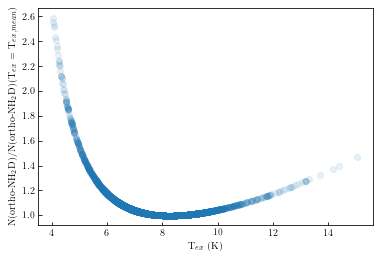

In [58]:
plt.scatter(oNH2D_Tex[oNH2D_mask], HMM1_oNH2D_Ncol_full/HMM1_oNH2D_Ncol_mTex, alpha=0.1)
plt.xlabel('T$_{ex}$ (K)')
plt.ylabel('N(ortho-NH$_2$D)/N(ortho-NH$_2$D)(T$_{ex}$ = T$_{ex, mean}$)')

In [59]:
HMM1_NH2D_Ncol_full = HMM1_oNH2D_Ncol_full + HMM1_pNH2D_Ncol_full

ValueError: operands could not be broadcast together with shapes (12956,) (4616,) 

In [ ]:
hd_oNH2D_2d['BUNIT'] = 'cm^-2'

oNH2D_clean = oNH2D_eTex.copy()
oNH2D_clean[~oNH2D_mask] = np.nan
oNH2D_clean[oNH2D_mask] = HMM1_oNH2D_Ncol_full
# hdu_NH2D = fits.PrimaryHDU(NH2D_clean/1e13, hd_2d)

hdu_oNH2D_clean = fits.PrimaryHDU(oNH2D_clean/oNH2D_mask/1e14, hd_oNH2D_2d)

fig = aplpy.FITSFigure(hdu_oNH2D_clean, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=20)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'N(o-NH$_2$D) map', relative=True)
# fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))
# fig.add_colorbar()

In [ ]:
hd_oNH2D_2d['BUNIT'] = 'cm^-2'

oNH2D_clean = oNH2D_eTex.copy()
oNH2D_clean[~oNH2D_mask] = np.nan
oNH2D_clean[oNH2D_mask] = HMM1_oNH2D_Ncol_mTex
# hdu_NH2D = fits.PrimaryHDU(NH2D_clean/1e13, hd_2d)

hdu_oNH2D_clean = fits.PrimaryHDU(oNH2D_clean/oNH2D_mask/1e14, hd_oNH2D_2d)

fig = aplpy.FITSFigure(hdu_oNH2D_clean, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=20)
plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'N(o-NH$_2$D) map', relative=True)
# fig.recenter(76.0709, 25.1783, radius=23*(u.arcsec).to(u.deg))
# fig.add_colorbar()

## o-NH$_2$D/NH$_3$
For this calculation we need to regrid the o-NH$_2$D column density map to match that of the NH3 one.

In [ ]:
from reproject import reproject_interp
hd_Ncol = fits.getheader(file_NH3_Ncol)
oNH2D_array, footprint = reproject_interp(hdu_oNH2D_clean, hd_Ncol)

oNH2D_NH3 = oNH2D_array/10**(NH3_Ncol-14.)
hdu_oNH2D_NH3_regrid = fits.PrimaryHDU(oNH2D_NH3, hd_Ncol)

hdu_oNH2D_regrid = fits.PrimaryHDU(oNH2D_array*1e14, hd_Ncol)

In [ ]:
fig = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid, figsize=(4,4))
fig.show_colorscale(vmin=0, vmax=1.5)
# plot_setup_alma(fig)
fig.add_colorbar()
fig.add_label(0.15, 0.9, 'N(o-NH$_2$D) map', relative=True)

In [ ]:
plt.scatter(NH3_Ncol, oNH2D_NH3, alpha=0.3)

In [ ]:
Ncol_NH3_min = 14.0
Ncol_NH3_max = 15.1
Ncol_ratio_min = 0.
Ncol_ratio_max = 3.5
gd_col = np.isfinite(NH3_Ncol * oNH2D_NH3)
NH3_Ncol_ratio_kde = hmm1_kde(NH3_Ncol[gd_col], oNH2D_NH3[gd_col], 
                              ymin=Ncol_ratio_min, ymax=Ncol_ratio_max, 
                              xmin=Ncol_NH3_min, xmax=Ncol_NH3_max, 
                              get_XY=False)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.rot90(NH3_Ncol_ratio_kde), cmap=plt.cm.gist_earth_r, 
          extent=[Ncol_NH3_min, Ncol_NH3_max, 
                  Ncol_ratio_min, Ncol_ratio_max])
ax.set_xlim([14.2, Ncol_NH3_max])
ax.set_ylim([Ncol_ratio_min, 3])
ax.set_xlabel(r'log$_{10}$(N$_{\rm NH_3}$ cm$^2$)')
ax.set_ylabel(r'[o-NH$_2$D/NH$_3$]')
ax.set_aspect('auto')
plt.show()

In [ ]:
plt.scatter(10**(NH3_Ncol-14.), oNH2D_array, alpha=0.1)

In [ ]:
Ncol_NH3_14_min = 0.0
Ncol_NH3_14_max = 12.0
Ncol_NH2D_14_min = 0.
Ncol_NH2D_14_max = 20.
gd_col = np.isfinite(10**(NH3_Ncol-14.) * oNH2D_array)
NH3_Ncol_14_kde = hmm1_kde(10**(NH3_Ncol[gd_col]-14.), 
                           oNH2D_array[gd_col], 
                           xmin=Ncol_NH3_14_min, xmax=Ncol_NH3_14_max, 
                           ymin=Ncol_NH2D_14_min, ymax=Ncol_NH2D_14_max, 
                           get_XY=False)

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.rot90(NH3_Ncol_14_kde), cmap=plt.cm.gist_earth_r, 
          extent=[Ncol_NH3_14_min, Ncol_NH3_14_max, 
                  Ncol_NH2D_14_min, Ncol_NH2D_14_max])
ax.set_xlim([Ncol_NH3_14_min, Ncol_NH3_14_max])
ax.set_ylim([Ncol_NH2D_14_min, Ncol_NH2D_14_max])
ax.set_xlabel(r'N(NH$_3$) (10$^{14}$ cm$^{-2}$)')
ax.set_ylabel(r'N(o-NH$_2$D) (10$^{14}$ cm$^{-2}$)')
ax.set_aspect('auto')
plt.show()

In [ ]:
from reproject import reproject_interp
hd_dv = fits.getheader(file_NH3_dv)
oNH2D_dv_array, footprint = reproject_interp(hdu_oNH2D_dv_thick, hd_dv)
oNH2D_vlsr_array, footprint = reproject_interp(hdu_oNH2D_vlsr_thick, hd_dv)

pNH2D_dv_array, footprint = reproject_interp(hdu_pNH2D_dv_thick, hd_dv)
pNH2D_vlsr_array, footprint = reproject_interp(file_pNH2D_Vlsr, hd_dv)

# oNH2D_NH3 = oNH2D_array/10**(NH3_Ncol-14.)
hdu_oNH2D_NH3_regrid_dv = fits.PrimaryHDU(oNH2D_dv_array, hd_dv)
hdu_oNH2D_NH3_regrid_vlsr = fits.PrimaryHDU(oNH2D_vlsr_array, hd_dv)

hdu_pNH2D_NH3_regrid_dv = fits.PrimaryHDU(pNH2D_dv_array, hd_dv)
hdu_pNH2D_NH3_regrid_vlsr = fits.PrimaryHDU(pNH2D_vlsr_array, hd_dv)

# hdu_oNH2D_regrid = fits.PrimaryHDU(oNH2D_array*1e14, hd_Ncol)

In [ ]:
color_kde = ['#e41a1c', 'blue']
# xrange = np.array([0, np.log10(12)])
xrange = np.array([0.04, 0.2])


gd_dv = oNH2D_mask & (oNH2D_edv > 0.)
wt = 1 / oNH2D_edv[gd_dv]**2
kde_oNH2D_dv = stats.gaussian_kde(oNH2D_dv[gd_dv], weights=wt)

gd_dv = (NH3_dv > 0.)
gd_dv_0 = np.isfinite(oNH2D_dv_array)
wt = 1 / NH3_edv[gd_dv]**2
wt_0 = 1 / NH3_edv[gd_dv_0]**2
kde_NH3_dv = stats.gaussian_kde(NH3_dv[gd_dv], weights=wt)
kde_NH3_dv_0 = stats.gaussian_kde(NH3_dv[gd_dv_0], weights=wt_0)

x_sample = np.linspace(xrange[0], xrange[1], num=100)
NH3_dv_sample = np.reshape(kde_NH3_dv(x_sample).T, x_sample.shape)
NH3_dv_sample_0 = np.reshape(kde_NH3_dv_0(x_sample).T, x_sample.shape)
oNH2D_dv_sample = np.reshape(kde_oNH2D_dv(x_sample).T, x_sample.shape)

#########
### Velocity Dispersion
#########
fig, ax = plt.subplots(figsize=(4, 4))
ax.plot(xrange, [0, 0], color='gray', linestyle='--')
ax.plot(x_sample, oNH2D_dv_sample, color=color_kde[0], label=r'$\sigma_v$')
ax.plot(x_sample, NH3_dv_sample, color=color_kde[1], label=r'$\sigma_v$')
ax.plot(x_sample, NH3_dv_sample_0, color=color_kde[1], label=r'$\sigma_v$')
#
ax.text(0.7, 0.9,  r'o-NH$_2$D', color=color_kde[0], 
        transform=ax.transAxes, size=17, weight=60)
ax.text(0.7, 0.8,  r'NH$_3$', color=color_kde[1], 
        transform=ax.transAxes, size=17, weight=60)
ax.set_xlabel(r"Velocity Dispersion, $\sigma_{v}$ (km s$^{-1}$)")
ax.set_ylabel(r"Density")
ax.set_xlim([0.07, 0.17])

ax.set_xticks([0.07, 0.1, 0.13, 0.16])
# ax.set_yticks([0, 0.1, 0.2, 0.3])


In [ ]:
dv_sample = [0.08, 0.2]
plt.scatter(NH3_dv, oNH2D_dv_array, alpha=0.1)
plt.plot(dv_sample, dv_sample, color='red')
plt.xlim(dv_sample)
plt.ylim(dv_sample)
# plt.set_as ('auto')
plt.xlabel('NH$_3$ Velocity Dispersion (km s$^{-1}$)')
plt.ylabel('o-NH$_2$D Velocity Dispersion (km s$^{-1}$)')

In [ ]:
fig = plt.figure(figsize=(8, 4))

fig_1 = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid_dv, figure=fig, 
                         subplot=[0.1, 0.1, 0.4, 0.8])
fig_1.show_colorscale(vmin=0.08, vmax=0.16)
fig_1.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_1, do_zoom=True)
fig_1.add_colorbar()
fig_1.colorbar.hide()
fig_1.add_label(0.15, 0.9, 'Velocity Dispersion map', relative=True)


fig_2 = aplpy.FITSFigure(file_NH3_dv, figure=fig, 
                         subplot=[0.5, 0.1, 0.4, 0.8])
fig_2.show_colorscale(vmin=0.08, vmax=0.16)
fig_2.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_2, do_zoom=True)
fig_2.add_colorbar()
fig_2.axis_labels.hide_y()
fig_2.tick_labels.hide_y()
fig_2.add_label(0.15, 0.9, 'Velocity Dispersion map', relative=True)

In [ ]:
hdu_oNH2D_NH3_regrid_vlsr

In [ ]:
plt.scatter(NH3_Vlsr, oNH2D_vlsr_array, alpha=0.1)

In [ ]:
fig = plt.figure(figsize=(12, 4))

fig_1 = aplpy.FITSFigure(hdu_oNH2D_NH3_regrid_vlsr, figure=fig, 
                         subplot=[0.1, 0.1, 0.3, 0.8])
fig_1.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
fig_1.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_1, do_zoom=True)
fig_1.add_colorbar()
fig_1.colorbar.hide()
fig_1.add_label(0.15, 0.9, 'Velocity map', relative=True)


fig_2 = aplpy.FITSFigure(hdu_pNH2D_NH3_regrid_vlsr, figure=fig, 
                         subplot=[0.4, 0.1, 0.3, 0.8])
fig_2.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
fig_2.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_2, do_zoom=True)
fig_2.add_colorbar()
fig_2.axis_labels.hide_y()
fig_2.tick_labels.hide_y()
fig_2.add_label(0.15, 0.9, 'Velocity map', relative=True)


fig_2 = aplpy.FITSFigure(file_NH3_Vlsr, figure=fig, 
                         subplot=[0.7, 0.1, 0.3, 0.8])
fig_2.show_colorscale(cmap='RdYlBu_r', vmin=4., vmax=4.5)
fig_2.show_contour(file_NH3_TdV, levels=1.*np.arange(1, 7), colors='k')
plot_setup_vla(fig_2, do_zoom=True)
fig_2.add_colorbar()
fig_2.axis_labels.hide_y()
fig_2.tick_labels.hide_y()
fig_2.add_label(0.15, 0.9, 'Velocity map', relative=True)